# Results:

This notebook is used to analyze the results of the tests.

First, a few imports and global variables:

In [90]:
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt

RESULTS_PATH = './results/'
TESTS = ['test_1']
EXTENSION = '.json'

# Test 1:

We extract the data in json to a pandas dataframe with the first experiment results:

In [91]:
with open(RESULTS_PATH + TESTS[0] + EXTENSION) as f:
    test_1 = json.load(f)['test_1']
df_t1 = pd.DataFrame(test_1)
# Replace -1e9 in best_fit for +1e9 in order to compute the score:
df_t1['best_fit'] = df_t1['best_fit'].replace(-1_000_000, 1_000_000)
# Print the first rows:
df_t1.head(None)

,algorithm,function,function_type,dimension,best_fit,best_ind,elapsed_time,seed,num_eval
0,TensorCro,AckleyFunction,local_minima,500,1.689693e+00,"[0.8795084953308105, 0.008874413557350636, 0.0...",100.031131,2023,3815
1,GeneticAlgorithm,AckleyFunction,local_minima,500,1.583612e+01,"[2.332674988463067, 2.0189780397871484, -8.065...",100.200603,2023,467
2,PSOAlgorithm,AckleyFunction,local_minima,500,2.042613e+01,"[-7.134469135488038, -17.219824480502965, -24....",100.019416,2023,720
3,HarmonySearchAlgorithm,AckleyFunction,local_minima,500,2.103534e+01,"[3.3558531622379593, -13.392862411763002, -7.5...",100.017413,2023,5486
4,SimulatedAnnealingAlgorithm,AckleyFunction,local_minima,500,2.131663e+01,"[-9.768631717118826, 3.1966465588896313, -13.8...",100.000155,2023,1104032
...,...,...,...,...,...,...,...,...,...
3995,TensorCro,Powell,other,5,3.543261e-07,"[0.005960430949926376, -0.0005890130996704102,...",100.036792,2032,38504
3996,GeneticAlgorithm,Powell,other,5,2.343669e-09,"[0.006815946803592272, -0.0006817742630679247,...",100.039716,2032,371634
3997,PSOAlgorithm,Powell,other,5,9.129341e-03,"[0.3043637908101141, -0.02984012530393118, 0.1...",100.000091,2032,1109671
3998,HarmonySearchAlgorithm,Powell,other,5,5.360397e-09,"[0.008605985223557648, -0.0008608360652009664,...",100.000070,2032,811929


In [92]:
# Drop where function = HolderTableFunction:
df_t1 = df_t1[df_t1['function'] != 'HolderTableFunction']

In [93]:
df_t1

,algorithm,function,function_type,dimension,best_fit,best_ind,elapsed_time,seed,num_eval
0,TensorCro,AckleyFunction,local_minima,500,1.689693e+00,"[0.8795084953308105, 0.008874413557350636, 0.0...",100.031131,2023,3815
1,GeneticAlgorithm,AckleyFunction,local_minima,500,1.583612e+01,"[2.332674988463067, 2.0189780397871484, -8.065...",100.200603,2023,467
2,PSOAlgorithm,AckleyFunction,local_minima,500,2.042613e+01,"[-7.134469135488038, -17.219824480502965, -24....",100.019416,2023,720
3,HarmonySearchAlgorithm,AckleyFunction,local_minima,500,2.103534e+01,"[3.3558531622379593, -13.392862411763002, -7.5...",100.017413,2023,5486
4,SimulatedAnnealingAlgorithm,AckleyFunction,local_minima,500,2.131663e+01,"[-9.768631717118826, 3.1966465588896313, -13.8...",100.000155,2023,1104032
...,...,...,...,...,...,...,...,...,...
3995,TensorCro,Powell,other,5,3.543261e-07,"[0.005960430949926376, -0.0005890130996704102,...",100.036792,2032,38504
3996,GeneticAlgorithm,Powell,other,5,2.343669e-09,"[0.006815946803592272, -0.0006817742630679247,...",100.039716,2032,371634
3997,PSOAlgorithm,Powell,other,5,9.129341e-03,"[0.3043637908101141, -0.02984012530393118, 0.1...",100.000091,2032,1109671
3998,HarmonySearchAlgorithm,Powell,other,5,5.360397e-09,"[0.008605985223557648, -0.0008608360652009664,...",100.000070,2032,811929


### Visualization: competitive score

Now, we compute the score of performance for each dimension and function:

The score of the algorithm respect to the dimension and function is 0 if in minimum and 1 if in maximum, in linear scale.

In [94]:
df = df_t1

# Set algorithm IDs
algo_ids = [("TensorCro", "TensorCRO"),
            ("GeneticAlgorithm", "Genetic Algorithm"),
            ("PSOAlgorithm", "Particle Swarm Optimization"),
            ("HarmonySearchAlgorithm", "Harmony Search"),
            ("SimulatedAnnealingAlgorithm", "Simulated Annealing")]
df['algorithm_id'] = df['algorithm'].apply(lambda x: [i for i, y in enumerate(algo_ids) if y[0] == x][0])
df['algorithm_name'] = df['algorithm'].apply(lambda x: [y[1] for y in algo_ids if y[0] == x][0])

# Calculate the minimum and maximum fitness for each algorithm, function, and dimension group
grouped = df.groupby(['algorithm', 'function', 'dimension'])['best_fit']
min_fitness = grouped.min().groupby(['algorithm', 'function']).min()
max_fitness = grouped.max().groupby(['algorithm', 'function']).max()

min_fitness

algorithm         function         
GeneticAlgorithm  AckleyFunction       1.390455e-05
                  BukinFunction6       1.922556e-01
                  DixonPrice           6.780714e+03
                  DropWaveFunction    -1.000000e+00
                  Easom               -9.005678e-03
                                           ...     
TensorCro         Michalewicz         -4.674100e+02
                  Powell               4.200586e-08
                  RastriginFunction    0.000000e+00
                  Rosenbrock           4.959795e+00
                  StyblinskiTang      -1.955794e+04
Name: best_fit, Length: 75, dtype: float64

In [95]:
# Merge the calculated minimum and maximum fitness back to the original DataFrame
df = df.merge(min_fitness, on=['algorithm', 'function'], suffixes=('', '_min'))
df = df.merge(max_fitness, on=['algorithm', 'function'], suffixes=('', '_max'))

# Calculate the score using the provided formula
df['score'] = 1 - (df['best_fit'] - df['best_fit_min']) / (df['best_fit_max'] - df['best_fit_min'])

# Drop the redundant columns if needed
df.drop(['best_fit_min', 'best_fit_max'], axis=1, inplace=True)

# Sorting the dataframe by algorithm, dimension, and function
df.sort_values(by=['dimension', 'algorithm_id'], inplace=True)

# Export as csv:
df.to_csv('./results/test_1.csv', index=False)

In [96]:
df

,algorithm,function,function_type,dimension,best_fit,best_ind,elapsed_time,seed,num_eval,algorithm_id,algorithm_name,score
4,TensorCro,AckleyFunction,local_minima,5,0.000328,"[3.947399090975523e-05, -0.0001346853387076407...",100.027402,2023,35513,0,TensorCRO,0.999908
9,TensorCro,AckleyFunction,local_minima,5,0.000149,"[4.2102416045963764e-05, -2.6087145670317113e-...",100.026791,2024,35594,0,TensorCRO,1.000000
14,TensorCro,AckleyFunction,local_minima,5,0.000614,"[-0.00021024708985351026, 6.189860869199038e-0...",100.029700,2025,35467,0,TensorCRO,0.999760
19,TensorCro,AckleyFunction,local_minima,5,0.000626,"[1.6347796190530062e-05, -9.618248441256583e-0...",100.025044,2026,35571,0,TensorCRO,0.999754
24,TensorCro,AckleyFunction,local_minima,5,0.000305,"[1.5847908798605204e-05, -2.9085276764817536e-...",100.025746,2027,34942,0,TensorCRO,0.999919
...,...,...,...,...,...,...,...,...,...,...,...,...
3725,SimulatedAnnealingAlgorithm,Powell,other,500,20612.761026,"[-2.959179634317563, 1.2385824109779837, 0.402...",100.000155,2028,1222965,4,Simulated Annealing,0.164525
3730,SimulatedAnnealingAlgorithm,Powell,other,500,22036.311403,"[4.40641053410959, 2.3490801198733657, 2.06845...",100.000101,2029,1216760,4,Simulated Annealing,0.106825
3735,SimulatedAnnealingAlgorithm,Powell,other,500,21933.850059,"[-0.03817337938310805, 1.3045140904575436, -0....",100.000114,2030,1199547,4,Simulated Annealing,0.110978
3740,SimulatedAnnealingAlgorithm,Powell,other,500,21748.517770,"[3.698311771004511, 1.1970677042663387, 0.7375...",100.000114,2031,1196625,4,Simulated Annealing,0.118490


We get the results according to the dimension and function by terms of means and plot the results in seaborn as a line plot:

C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

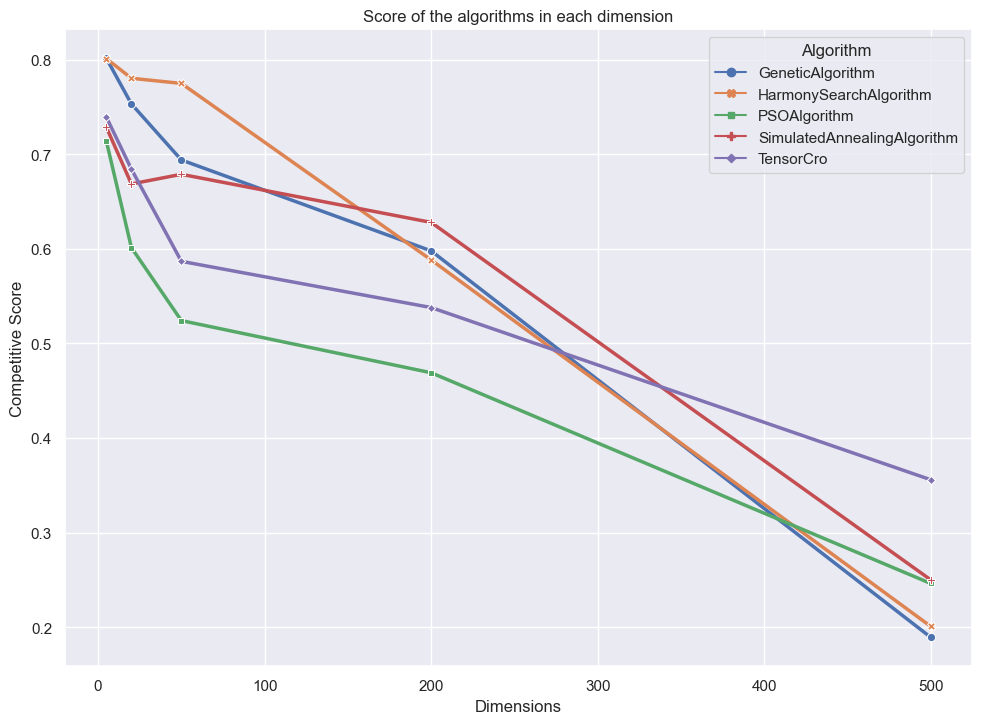

In [97]:
new_df = df.groupby(['algorithm', 'dimension']).mean(numeric_only=True)
new_df.reset_index(inplace=True)
new_df.head(None)

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.lineplot(data=new_df, x="dimension", y="score", hue="algorithm", style="algorithm", markers=True, dashes=False, linewidth=2.5)
# Labels of the sns plot:
fig.set(xlabel='Dimensions', ylabel='Competitive Score')
fig.set_title('Score of the algorithms in each dimension')
fig.legend(title='Algorithm')
fig.figure.savefig('./results/test_1.png')

## Visualization: comparative score (within functions)

In [98]:
df = df_t1

# Calculate the minimum and maximum fitness for each algorithm, function, and dimension group
grouped = df.groupby(['function', 'dimension'])['best_fit']
min_fitness = grouped.min()
max_fitness = grouped.max()

min_fitness

function        dimension
AckleyFunction  5            3.552714e-15
                20           9.422109e-03
                50           2.677536e-02
                200          4.860611e-01
                500          1.299316e+00
                                 ...     
StyblinskiTang  5           -1.958308e+02
                20          -7.833221e+02
                50          -1.958232e+03
                200         -7.818410e+03
                500         -1.955794e+04
Name: best_fit, Length: 75, dtype: float64

In [99]:
# Merge the calculated minimum and maximum fitness back to the original DataFrame
df = df.merge(min_fitness, on=['function', 'dimension'], suffixes=('', '_min'))
df = df.merge(max_fitness, on=['function', 'dimension'], suffixes=('', '_max'))

# Calculate the score using the provided formula
df['score'] = 1 - (df['best_fit'] - df['best_fit_min']) / (df['best_fit_max'] - df['best_fit_min'])

In [100]:
# Check if 'score' is NaN somewhere:
df[df['score'].isna()]['function'].unique()

array(['Easom'], dtype=object)

In [101]:
df['score'] = df['score'].fillna(1)

C:\Users\ViníciusGarcia\AppData\Local\Temp\ipykernel_20836\3809909782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.sort_values(by=['dimension', 'algorithm_id'], inplace=True)
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\ve

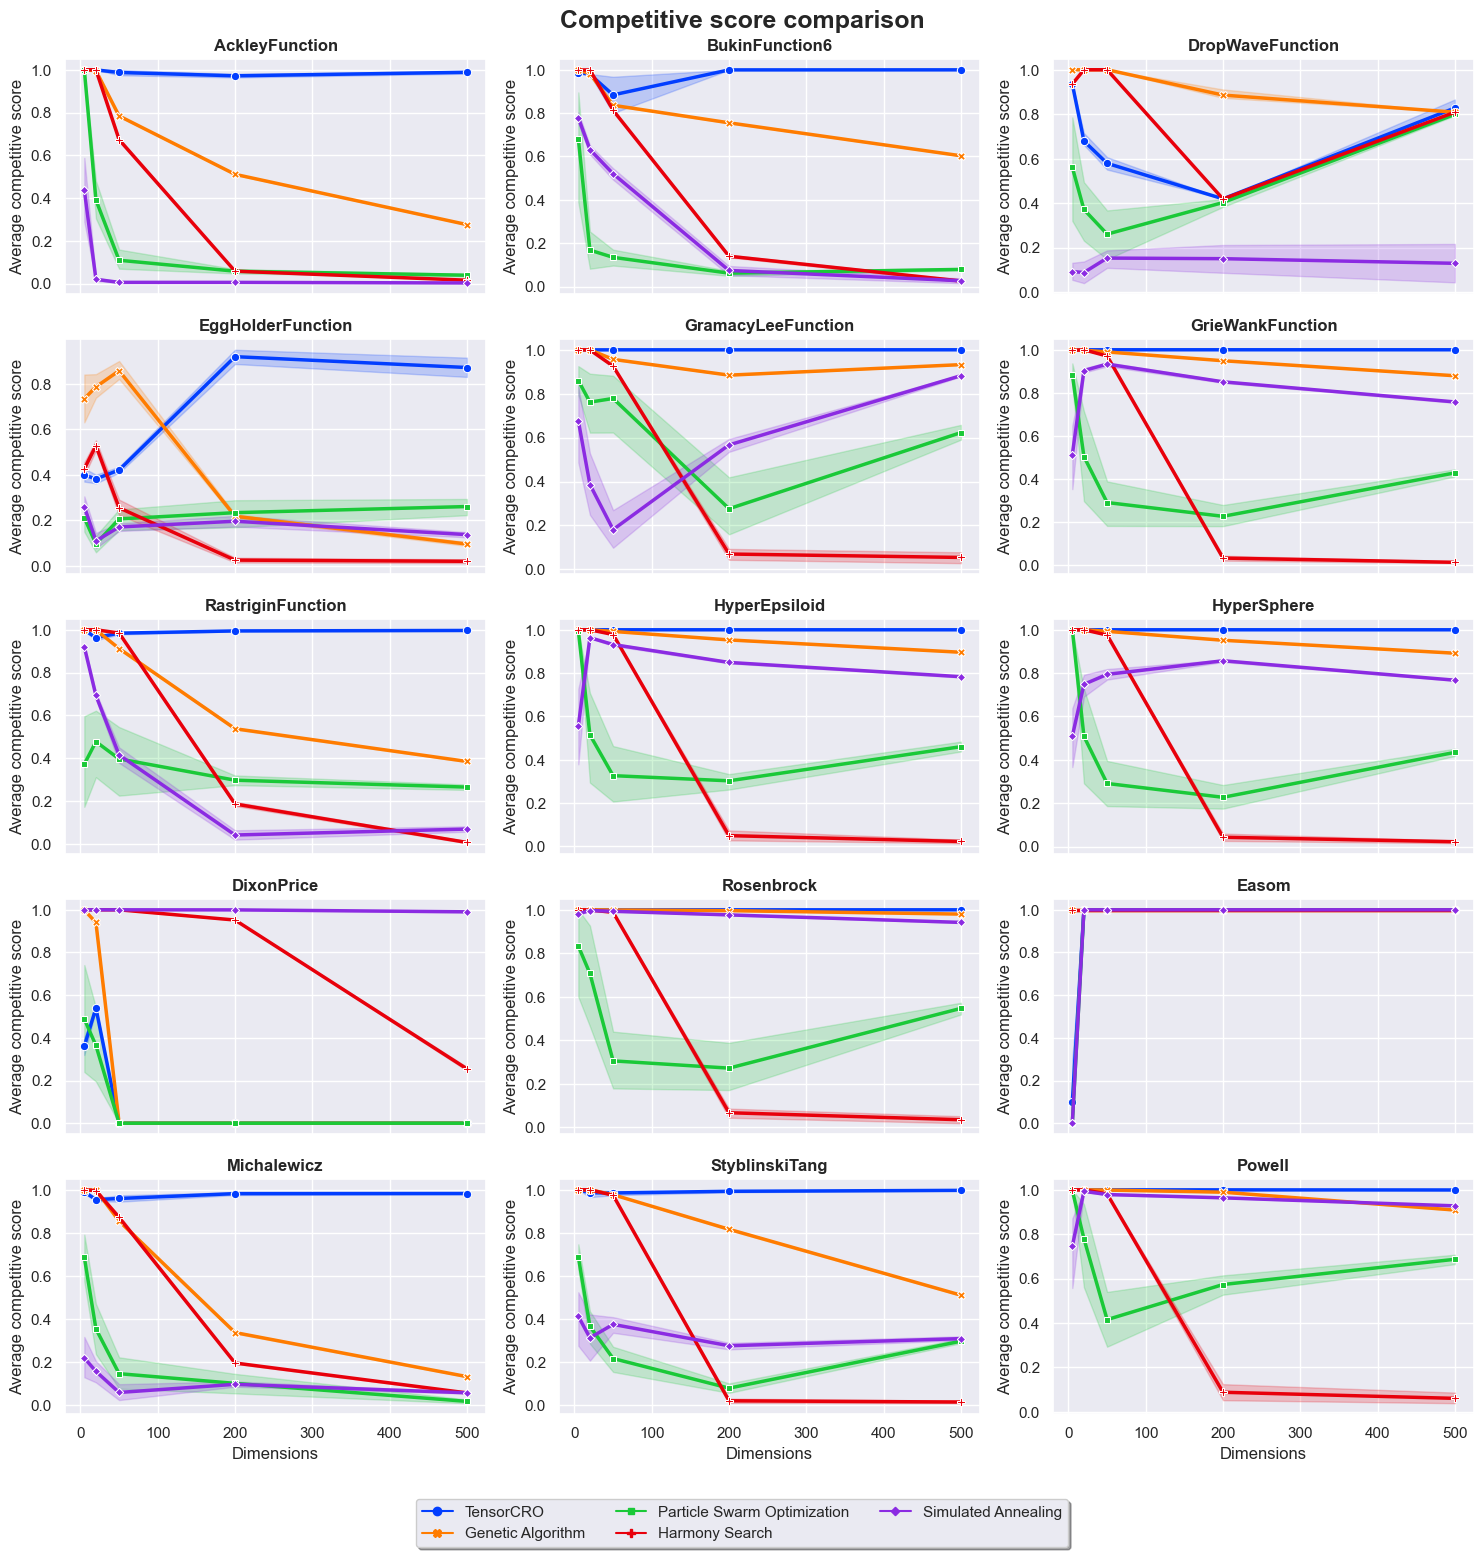

In [102]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, axs = plt.subplots(5, 3, figsize=(15, 15), sharex=True)

for ax, obj_fn in zip(axs.flat, df_t1['function'].unique()):
    _df = df[df['function'] == obj_fn]
    _df.sort_values(by=['dimension', 'algorithm_id'], inplace=True)
    sns.lineplot(data=_df, x="dimension", y="score", hue="algorithm_name", style="algorithm_name",
                 markers=True, dashes=False, linewidth=2.5, legend=(ax == axs.flat[-1]), ax=ax)
    ax.set_title(obj_fn, fontweight='bold')
    ax.set_ylabel("Average competitive score")
    ax.set_xlabel("Dimensions")

lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
lgd = fig.legend(lines, labels, loc='outside lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fancybox=True, shadow=True)
ttl = plt.suptitle('Competitive score comparison', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.savefig('./results/test_1_score.png', dpi=300, bbox_extra_artists=[lgd, ttl], bbox_inches='tight')

C:\Users\ViníciusGarcia\AppData\Local\Temp\ipykernel_20836\1693886523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df["dimension_str"] = _df["dimension"].astype(str)
C:\Users\ViníciusGarcia\AppData\Local\Temp\ipykernel_20836\1693886523.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.sort_values(by=['dimension', 'algorithm_id'], inplace=True)
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

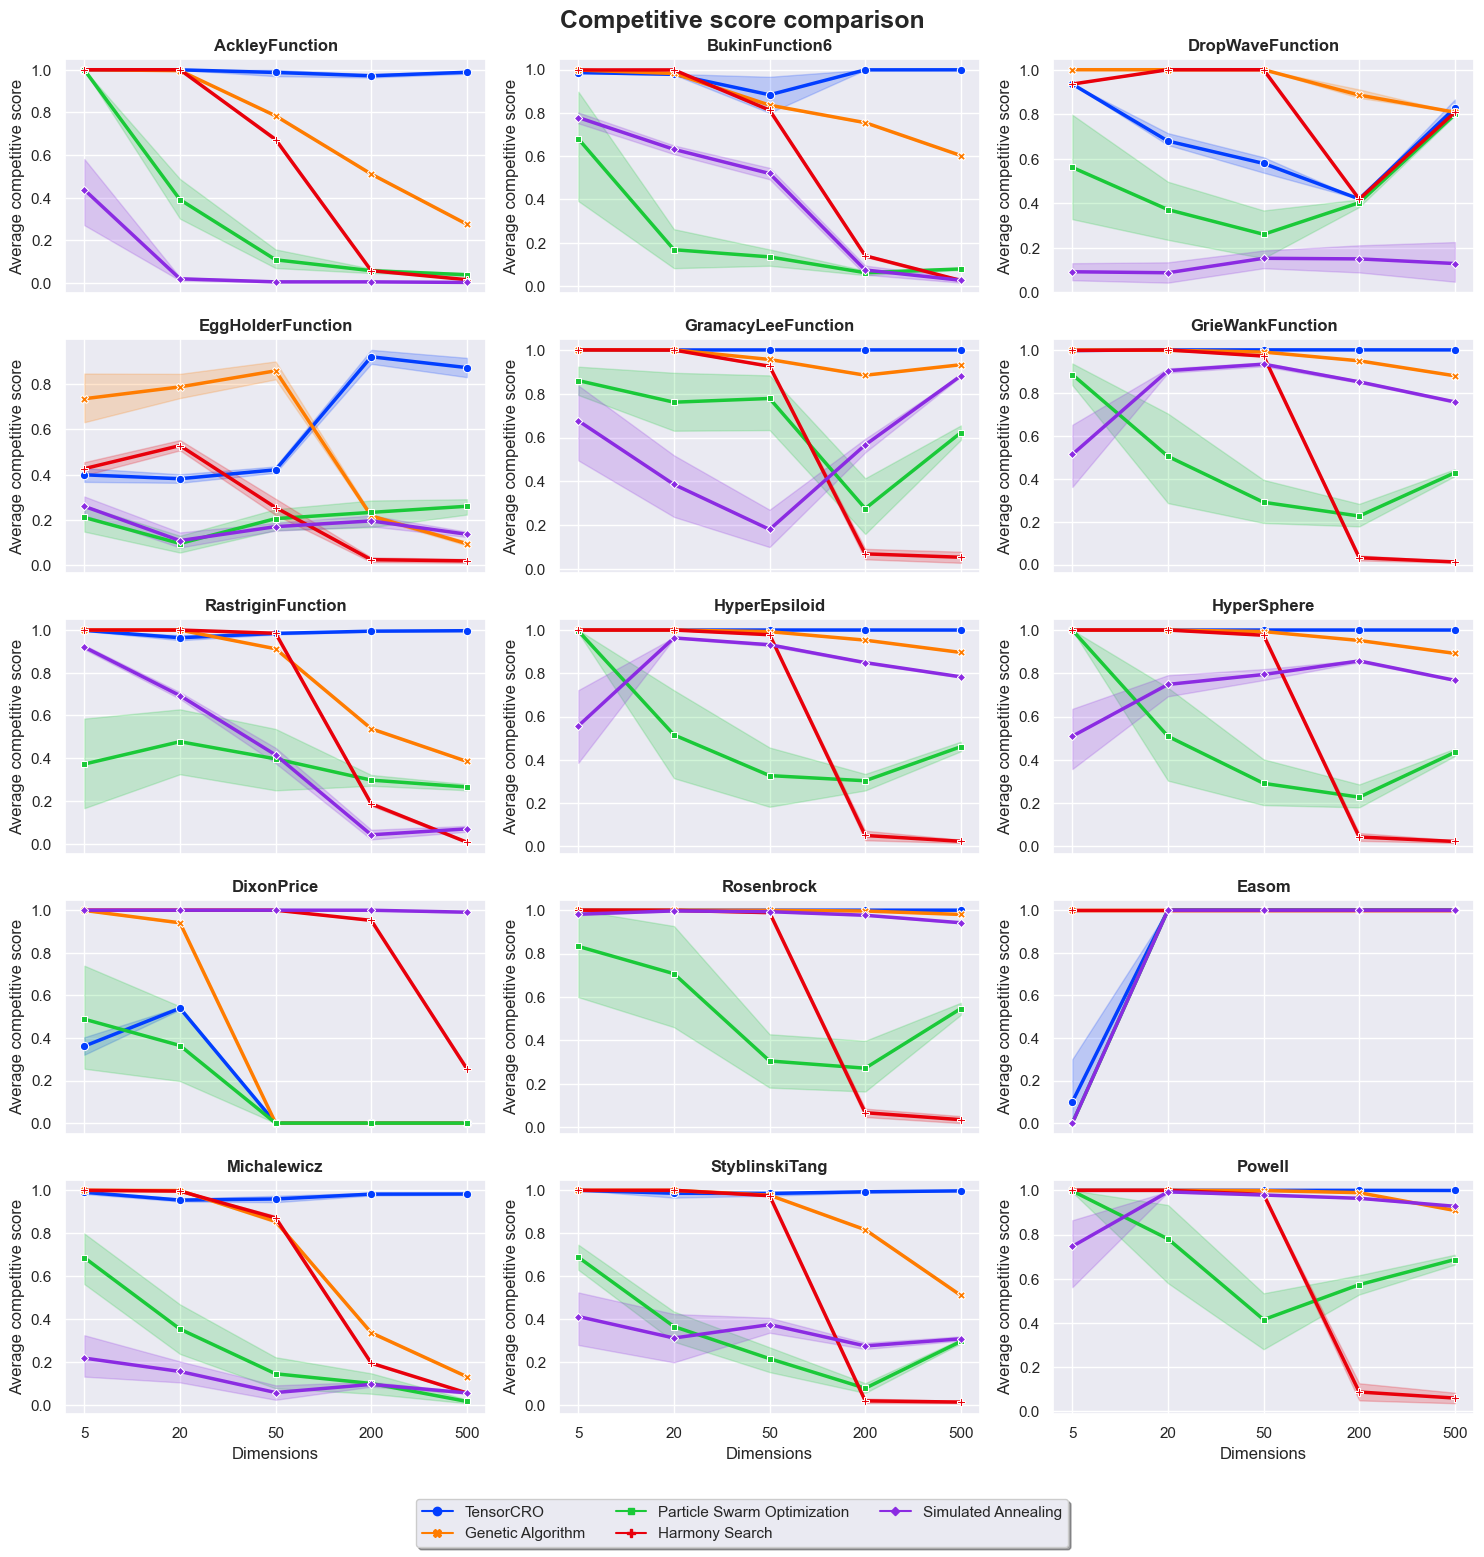

In [103]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, axs = plt.subplots(5, 3, figsize=(15, 15), sharex=True)

for ax, obj_fn in zip(axs.flat, df_t1['function'].unique()):
    _df = df[df['function'] == obj_fn]
    _df["dimension_str"] = _df["dimension"].astype(str)
    _df.sort_values(by=['dimension', 'algorithm_id'], inplace=True)
    sns.lineplot(data=_df, x="dimension_str", y="score", style="algorithm_name", hue="algorithm_name",
                 markers=True, dashes=False, linewidth=2.5, legend=(ax == axs.flat[-1]), ax=ax)
    ax.set_title(obj_fn, fontweight='bold')
    ax.set_ylabel("Average competitive score")
    ax.set_xlabel("Dimensions")

lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
lgd = fig.legend(lines, labels, loc='outside lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fancybox=True,
                 shadow=True)
ttl = plt.suptitle('Competitive score comparison', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.savefig('./results/test_1_score-evenly.png', dpi=300, bbox_extra_artists=[lgd, ttl], bbox_inches='tight')

### Visualization: best fitness across functions

Another way to compare the results is to plot the average best fitness for each objective function and dimension:

C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

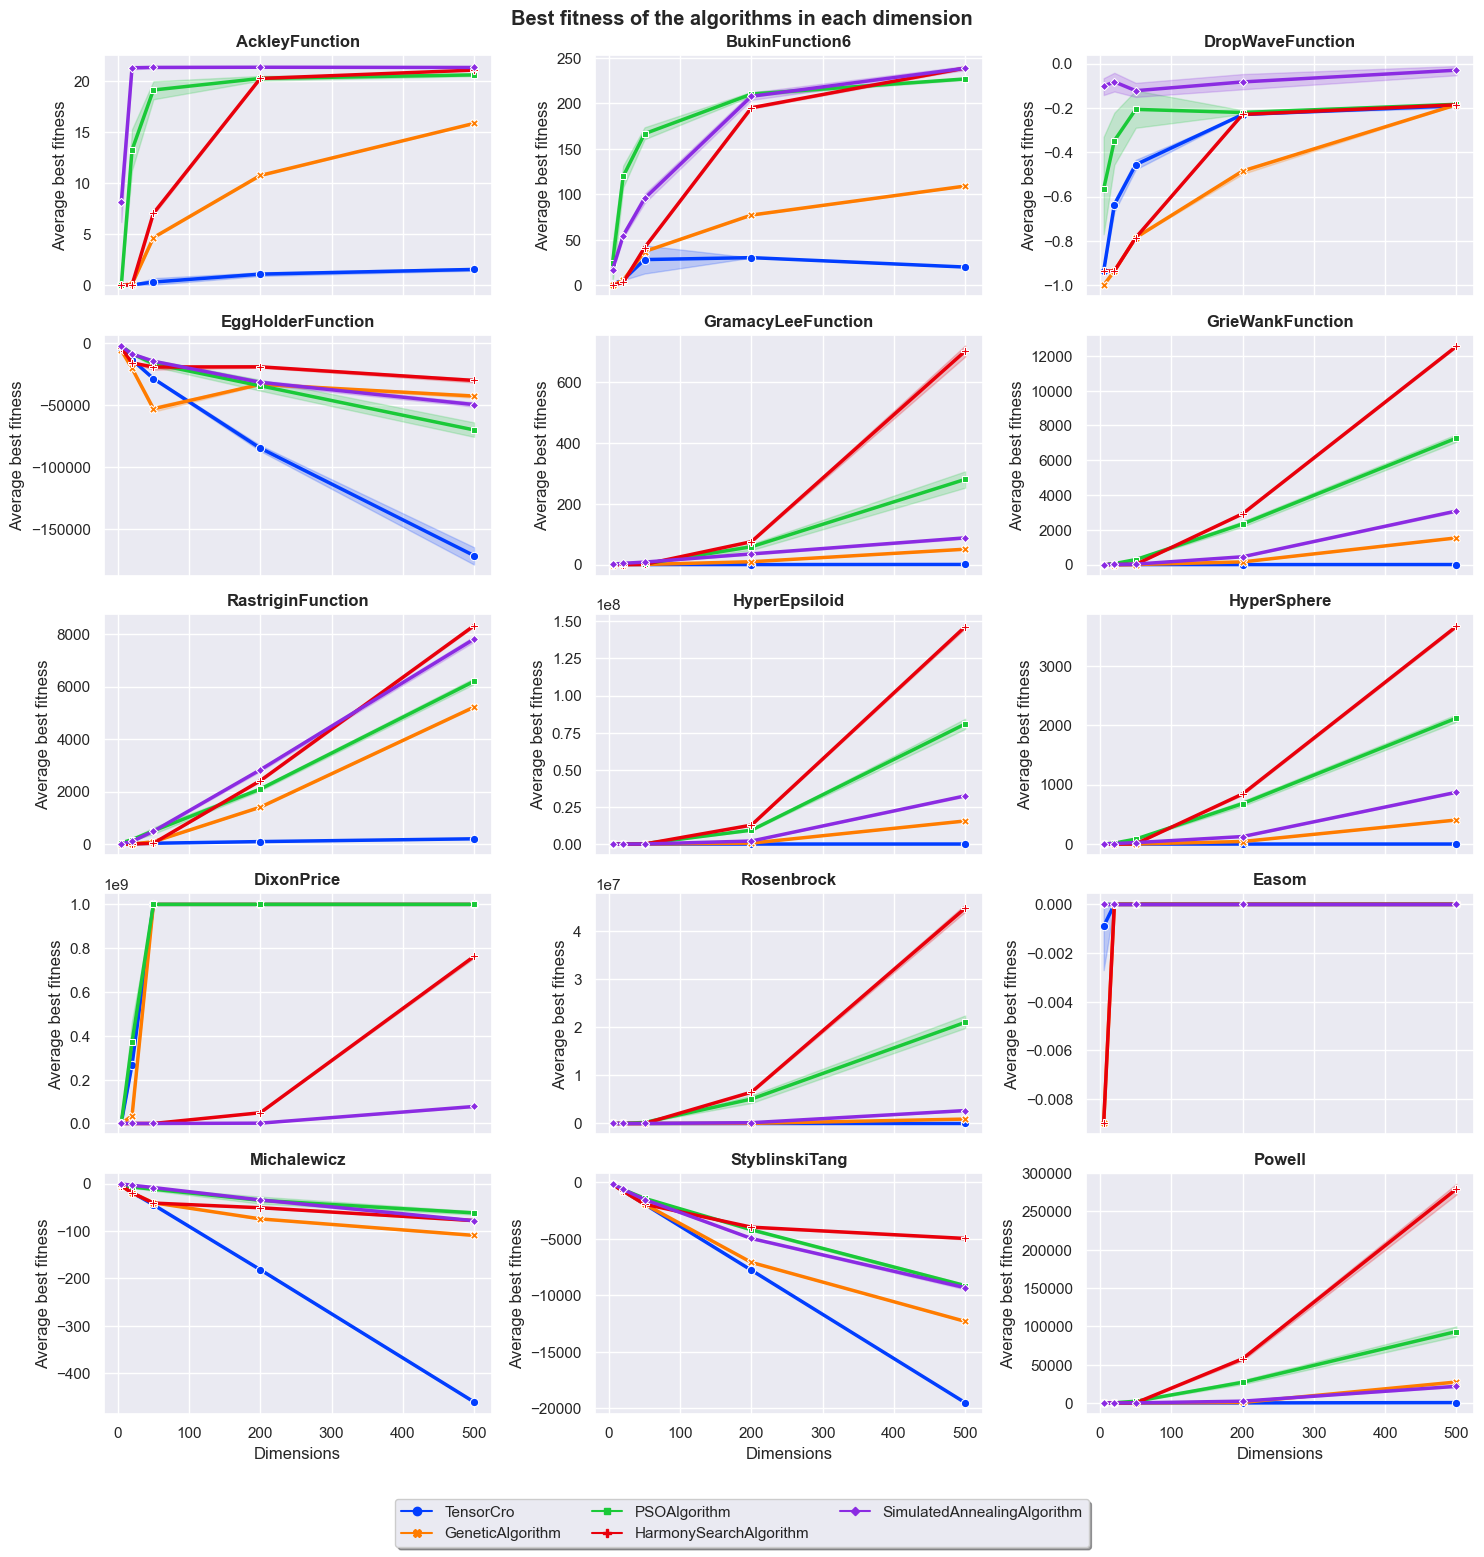

In [104]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, axs = plt.subplots(5, 3, figsize=(15, 15), sharex=True)

for ax, obj_fn in zip(axs.flat, df_t1['function'].unique()):
    sns.lineplot(data=df_t1[df_t1['function'] == obj_fn], x="dimension", y="best_fit", hue="algorithm",
                 style="algorithm", markers=True, dashes=False, linewidth=2.5, legend=(ax == axs.flat[-1]), ax=ax)
    ax.set_title(obj_fn, fontweight='bold')
    ax.set_ylabel("Average best fitness")
    ax.set_xlabel("Dimensions")

lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
lgd = fig.legend(lines, labels, loc='outside lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fancybox=True, shadow=True)
ttl = plt.suptitle('Best fitness of the algorithms in each dimension', fontweight='bold')
plt.tight_layout()
plt.savefig('./results/test_1_best_fit.png', dpi=300, bbox_extra_artists=[lgd, ttl], bbox_inches='tight')

Since this visualization makes it hard to compare results in smaller dimensions, we can use a logarithmic scale when the data allows (i.e. it is solely positive):

C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ViníciusGarcia\Documents\Github\TensorCRO\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

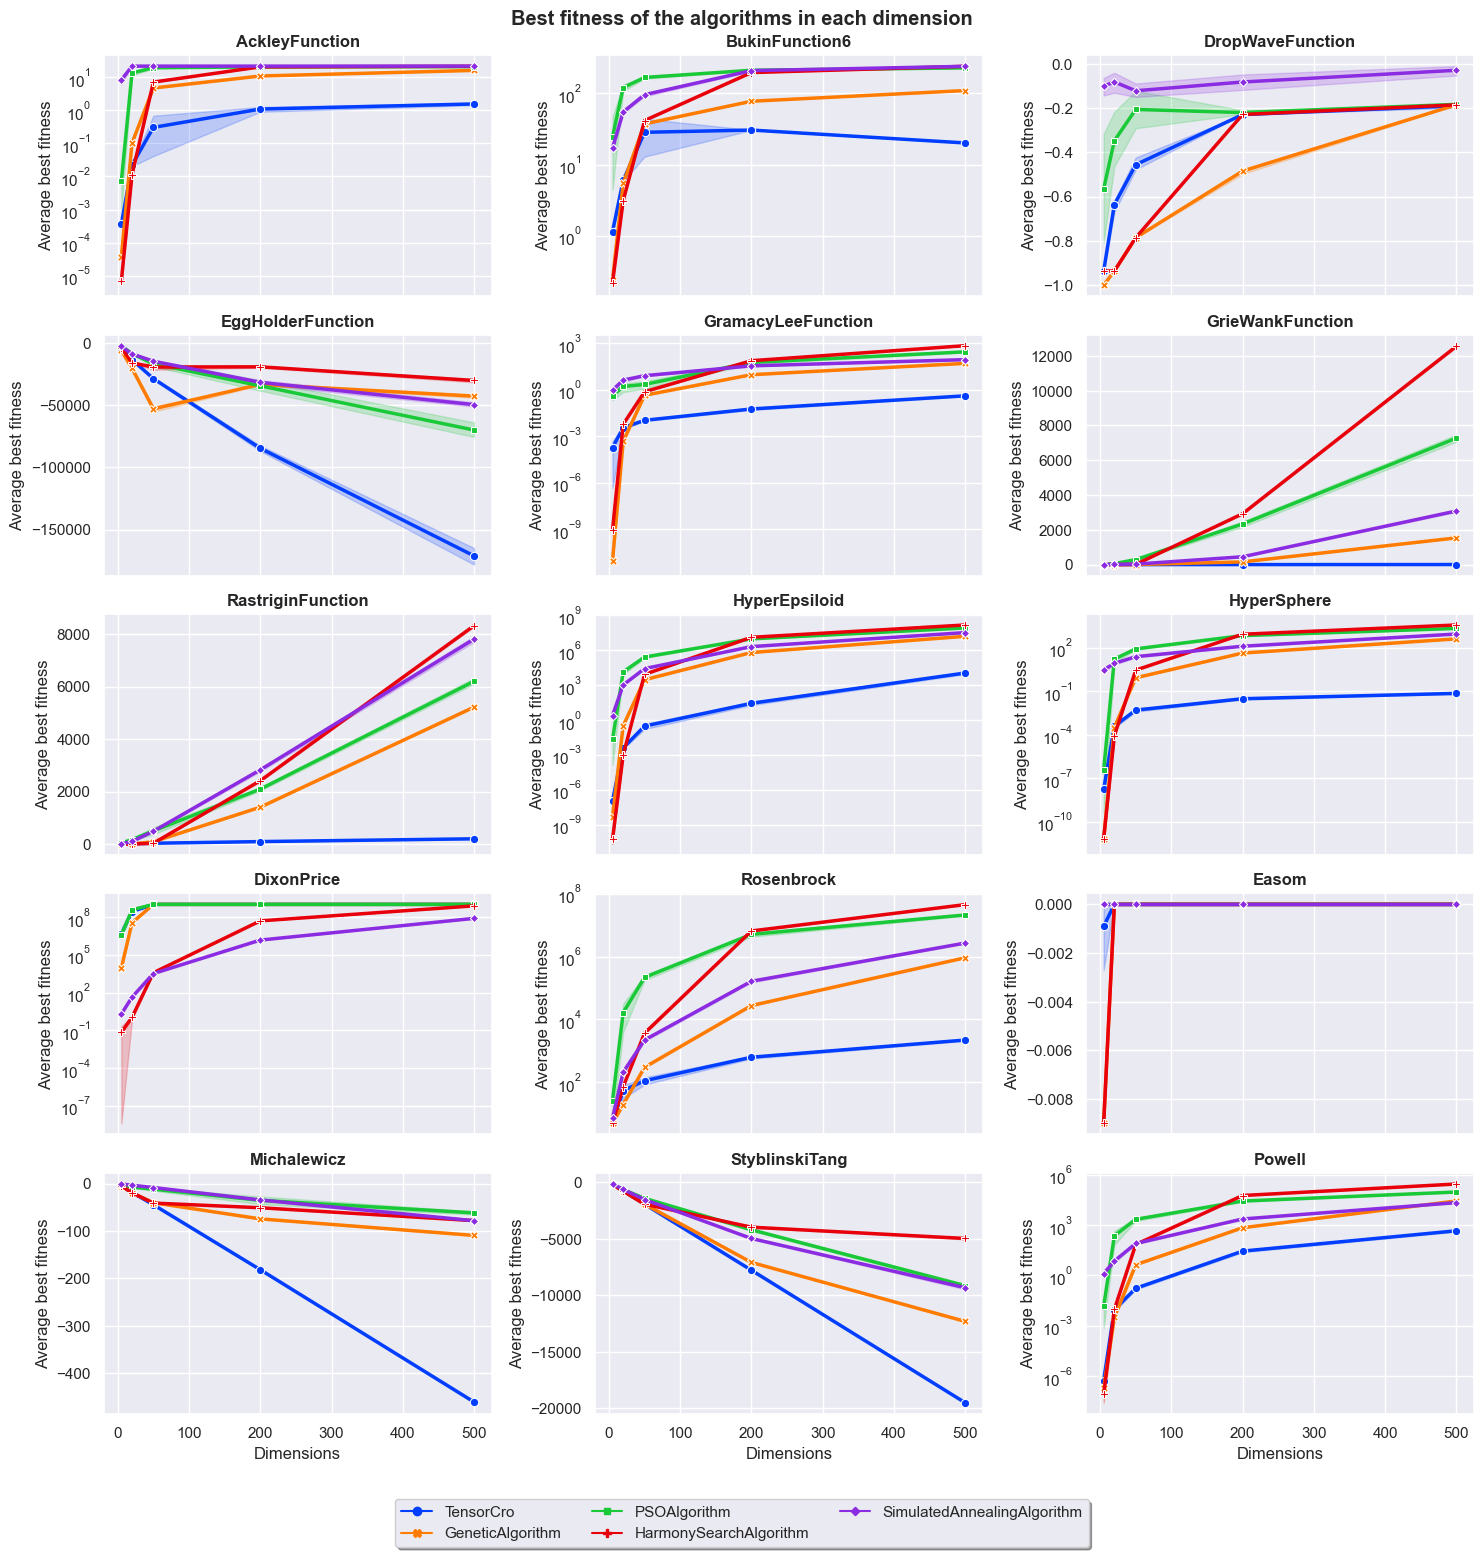

In [105]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, axs = plt.subplots(5, 3, figsize=(15, 15), sharex=True)

for ax, obj_fn in zip(axs.flat, df_t1['function'].unique()):
    _df = df_t1[df_t1['function'] == obj_fn]
    sns.lineplot(data=_df, x="dimension", y="best_fit", hue="algorithm",
                 style="algorithm", markers=True, dashes=False, linewidth=2.5, legend=(ax == axs.flat[-1]), ax=ax)
    ax.set_title(obj_fn, fontweight='bold')
    ax.set_ylabel("Average best fitness")
    ax.set_xlabel("Dimensions")
    if _df['best_fit'].min() > 0:
        ax.set_yscale('log')

lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
lgd = fig.legend(lines, labels, loc='outside lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fancybox=True, shadow=True)
ttl = plt.suptitle('Best fitness of the algorithms in each dimension', fontweight='bold')
plt.tight_layout()
plt.savefig('./results/test_1_best_fit_log.png', dpi=300, bbox_extra_artists=[lgd, ttl], bbox_inches='tight')